In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
%matplotlib inline

In [4]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1   timedelta                       39644 non-null  float64
 2   n_tokens_title                  39644 non-null  float64
 3   n_tokens_content                39644 non-null  float64
 4   n_unique_tokens                 39644 non-null  float64
 5   n_non_stop_words                39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [6]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [7]:
df.isna().sum()

url                              0
timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [8]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment

In [9]:
df.columns = df.columns.str.replace(' ', '')
columns_to_drop = ['url', 'timedelta']
df = df.drop(columns=(columns_to_drop))
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [10]:
# Membuat fitur baru
df['mean_tokens_per_image'] = df['n_tokens_content'] / (df['num_imgs'] + 1)  # Hindari pembagian nol
df['total_media'] = df['num_imgs'] + df['num_videos']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df.drop(['shares'], axis=1)  # Exclude non-relevant and target columns
y = df['shares']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features to improve MLP performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm shapes of the scaled data
X_train_scaled.shape, X_test_scaled.shape

((31715, 60), (7929, 60))

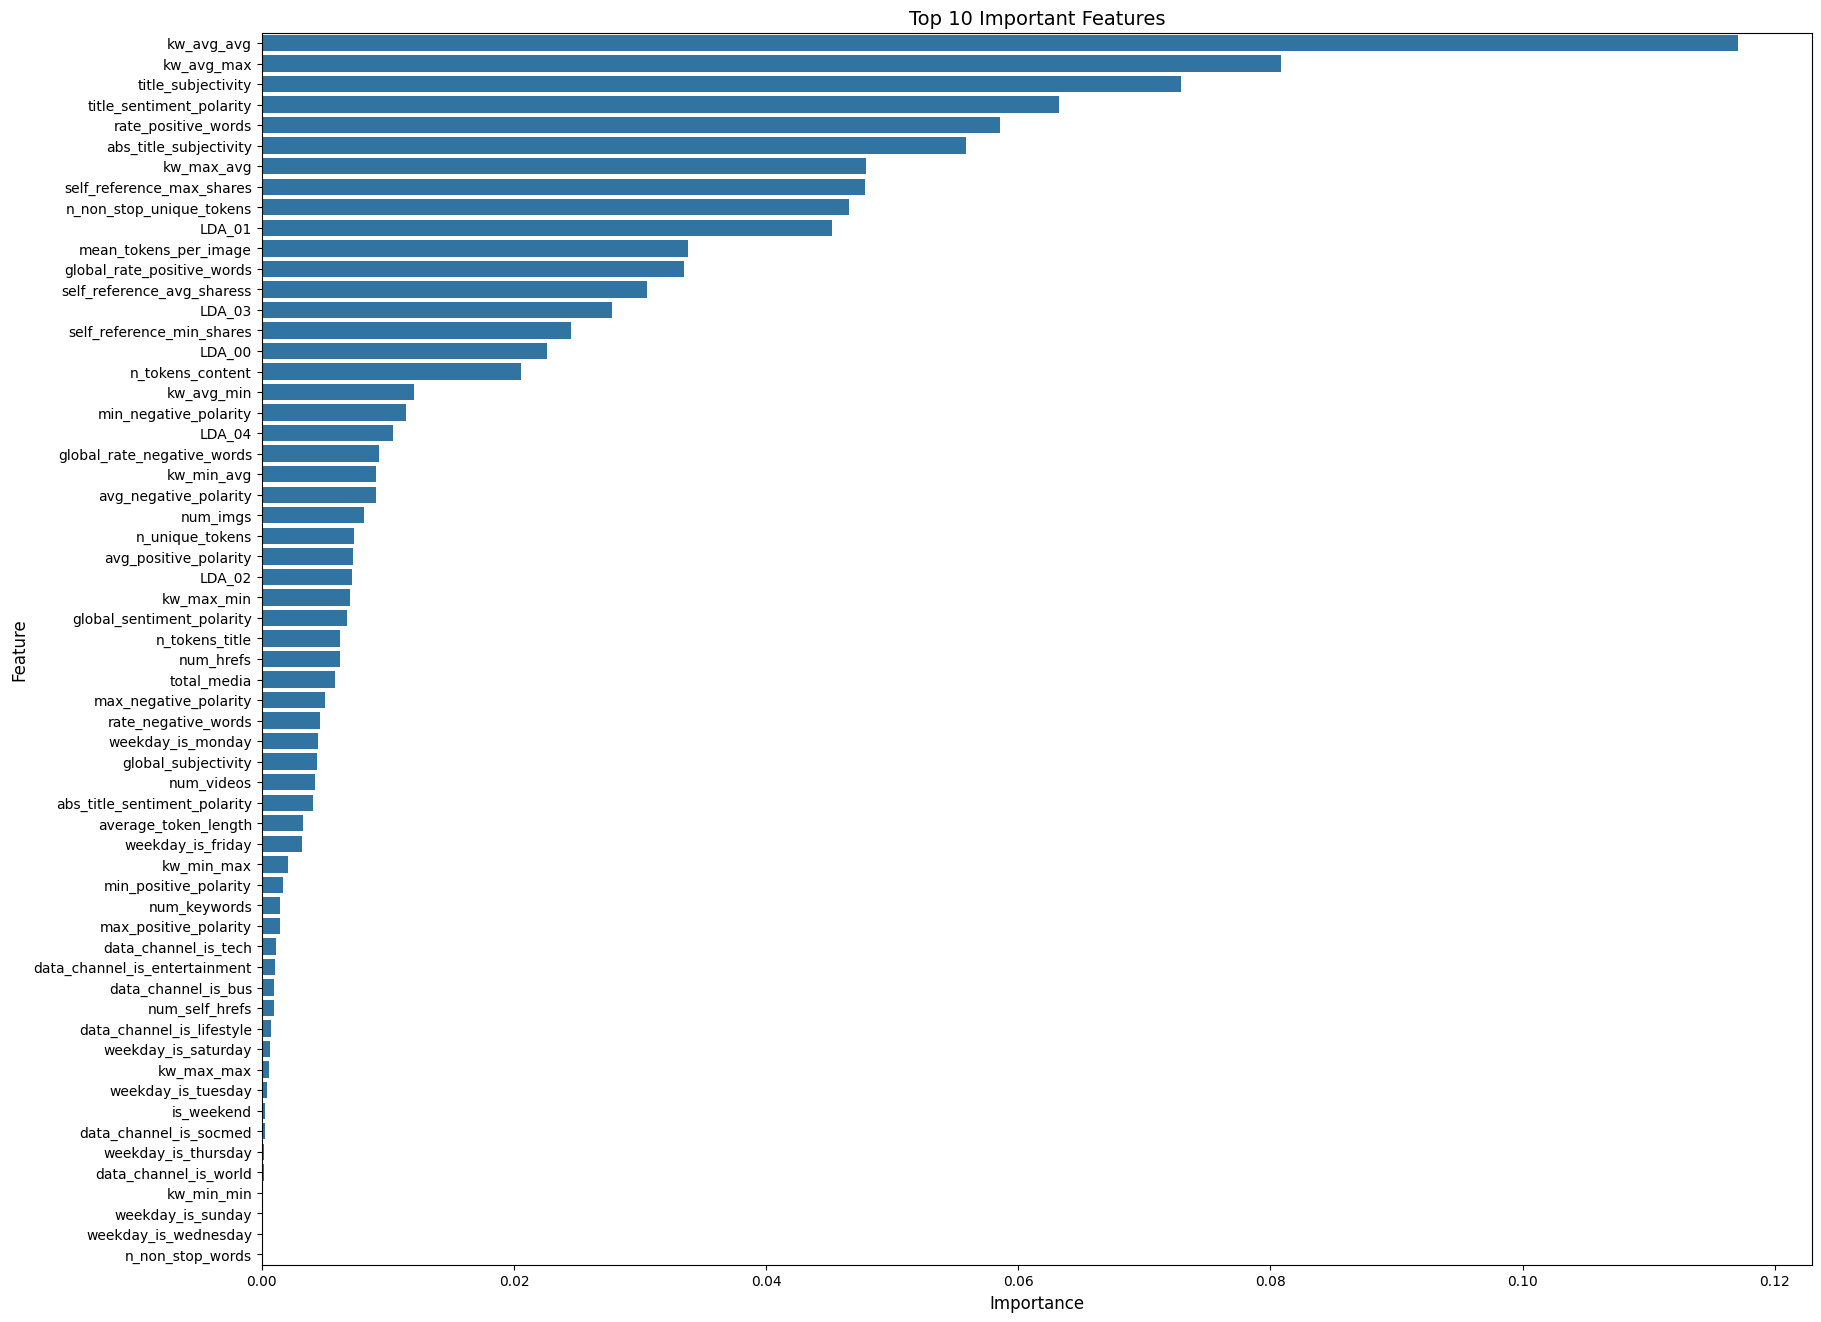

,Feature,Importance
0,kw_avg_avg,1.170833e-01
1,kw_avg_max,8.082230e-02
2,title_subjectivity,7.288806e-02
3,title_sentiment_polarity,6.323466e-02
4,rate_positive_words,5.856733e-02
5,abs_title_subjectivity,5.581581e-02
6,kw_max_avg,4.794101e-02
7,self_reference_max_shares,4.788003e-02
8,n_non_stop_unique_tokens,4.659932e-02
9,LDA_01,4.522676e-02


In [12]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor on a subset of the data
rf = RandomForestRegressor(n_estimators=10, random_state=42)  # Reduced estimators for speed
rf.fit(X_train[:5000], y_train[:5000])  # Use a subset of the data

# Extract feature importances
importance_values = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_values
}).sort_values(by='Importance', ascending=False)

# Visualize the top 10 important features
plt.figure(figsize=(20, 16))
sns.barplot(data=importance_df.head(60), x='Importance', y='Feature', orient='h')
plt.title('Top 10 Important Features', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

# Display the sorted feature importance DataFrame
importance_df.reset_index(drop=True, inplace=True)
importance_df.head(60)  # Display the top 60 features by importance

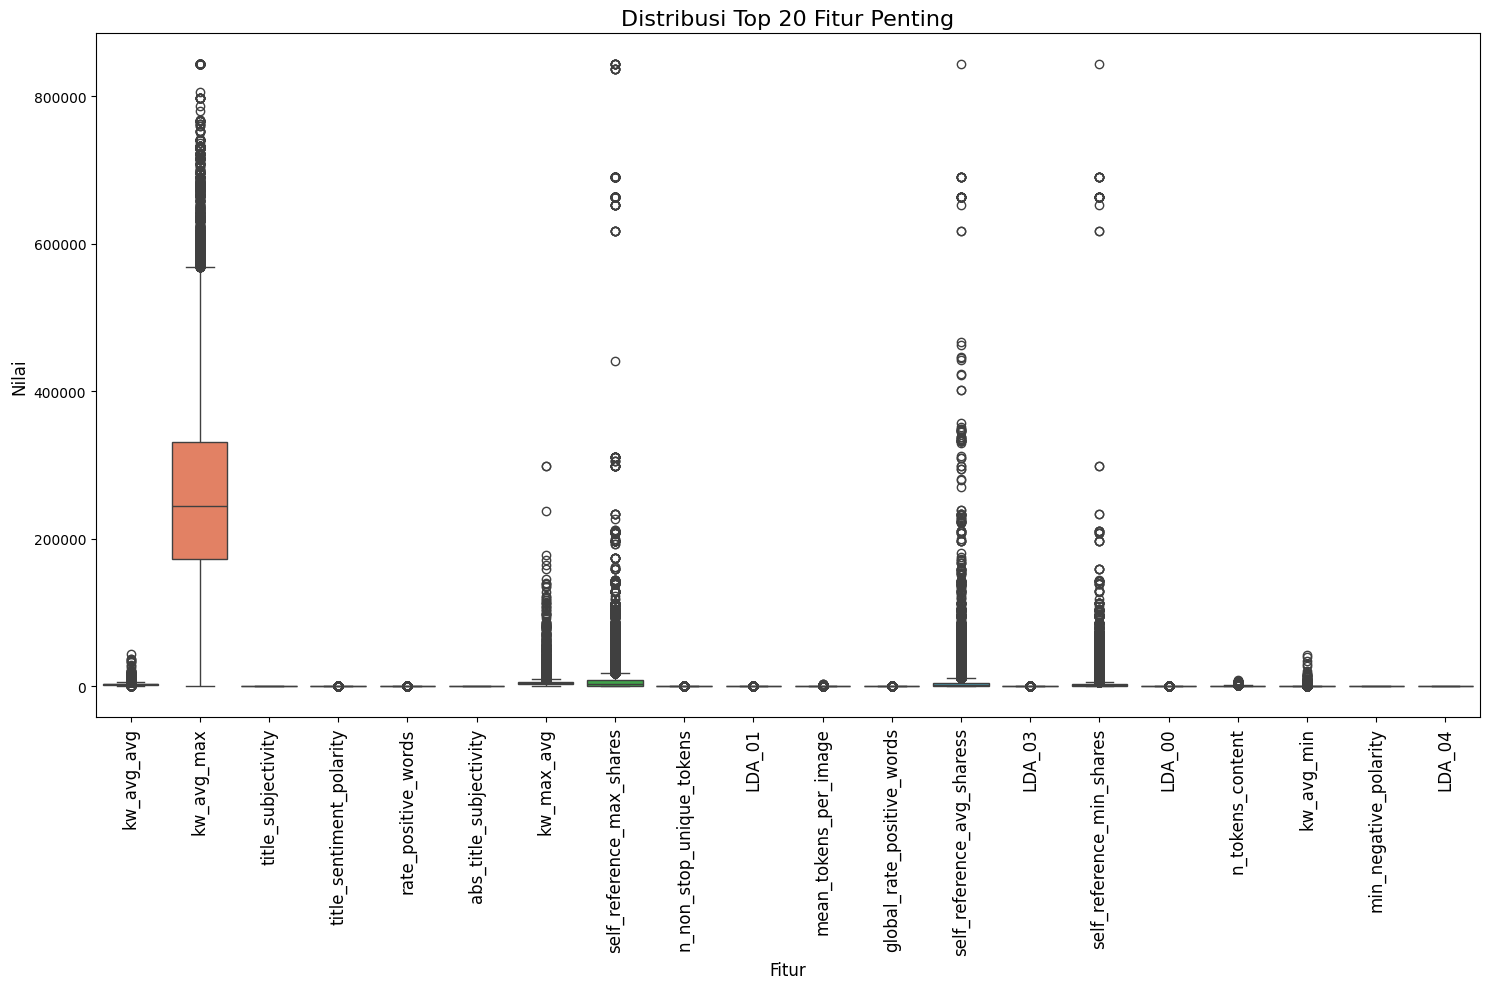

In [13]:
# Select top 20 important features
top_20_features = importance_df.head(20)['Feature'].values

# Subset the dataset with the selected features
X_selected = X[top_20_features]

# Visualize the distribution of the selected features
plt.figure(figsize=(15, 10))
sns.boxplot(data=X_selected)
plt.title('Distribusi Top 20 Fitur Penting', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.xlabel('Fitur', fontsize=12)
plt.tight_layout()
plt.show()


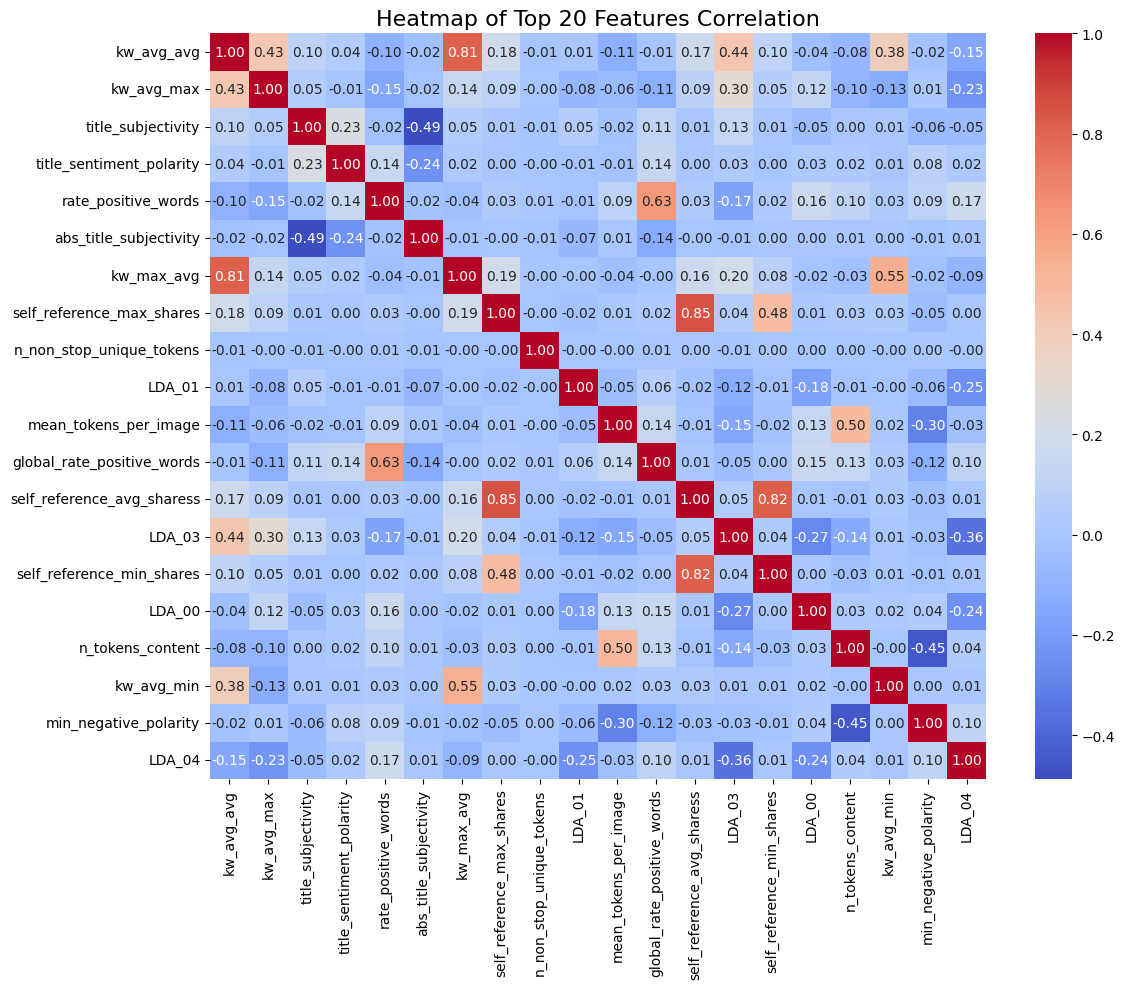

In [14]:
# Visualize heatmap for correlations between the top 20 features
plt.figure(figsize=(12, 10))
correlation_matrix = X_selected.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Top 20 Features Correlation', fontsize=16)
plt.tight_layout()
plt.show()

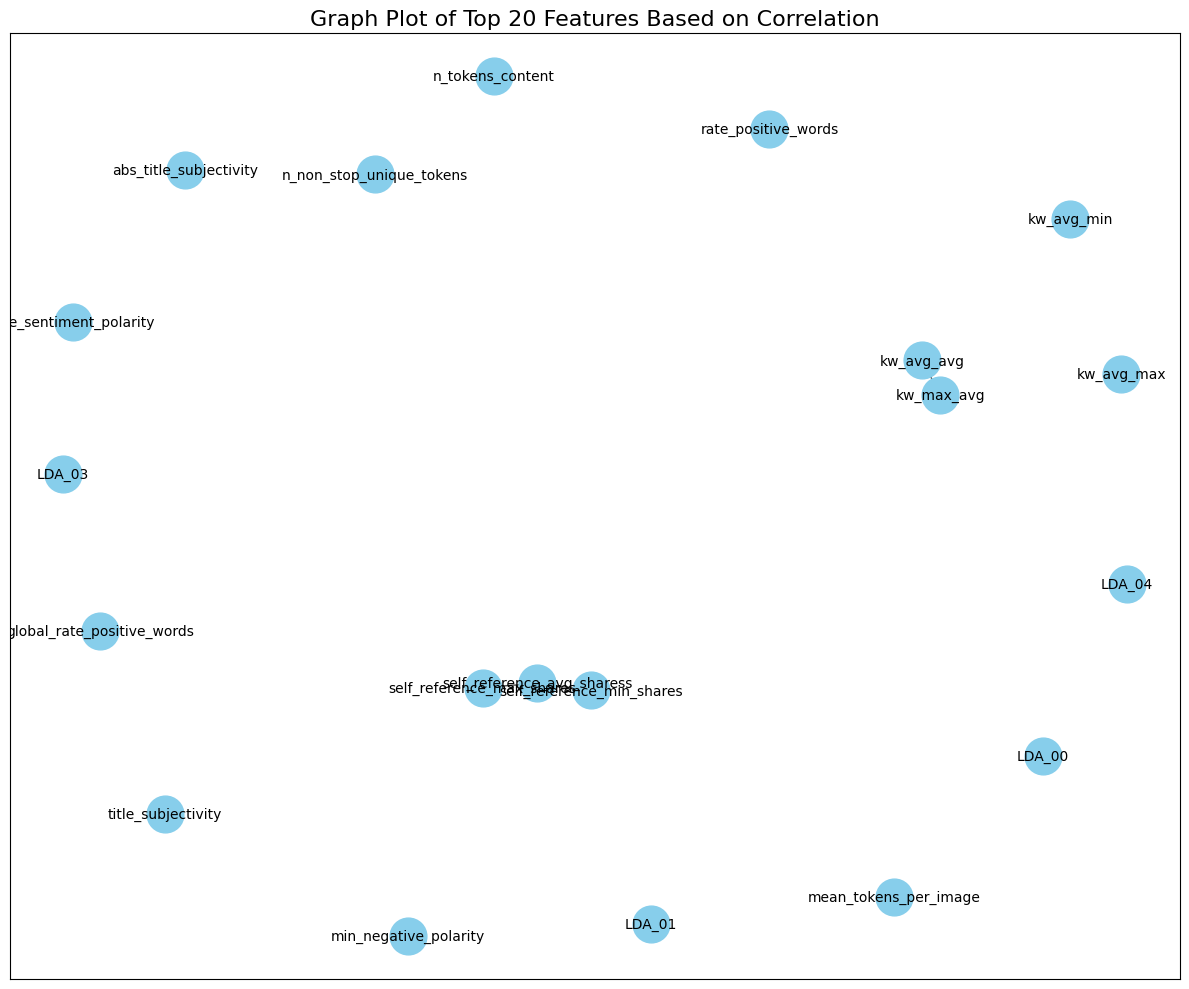

In [15]:
import networkx as nx

# Create a graph for the top 20 features based on their correlation
G = nx.Graph()

# Add nodes
for feature in X_selected.columns:
    G.add_node(feature)

# Add edges based on correlation threshold
threshold = 0.7  # Set a threshold for strong correlations
for i, feature1 in enumerate(X_selected.columns):
    for j, feature2 in enumerate(X_selected.columns):
        if i < j:  # Avoid duplicate edges
            correlation = correlation_matrix.iloc[i, j]
            if abs(correlation) > threshold:
                G.add_edge(feature1, feature2, weight=correlation)

# Draw the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

plt.title('Graph Plot of Top 20 Features Based on Correlation', fontsize=16)
plt.tight_layout()
plt.show()


In [16]:

# Preprocessing: Split the data and standardize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm shapes of the processed data
X_train_scaled.shape, X_test_scaled.shape

((31715, 20), (7929, 20))

In [17]:
# Define the MLP Regression model
class MLPRegression(nn.Module):
    def __init__(self, input_size, hidden_layers, activation):
        super(MLPRegression, self).__init__()
        layers = []
        for neurons in hidden_layers:
            layers.append(nn.Linear(input_size, neurons))
            if activation == 'relu':
                layers.append(nn.ReLU())
            elif activation == 'sigmoid':
                layers.append(nn.Sigmoid())
            elif activation == 'tanh':
                layers.append(nn.Tanh())
            elif activation == 'linear':
                pass  # No activation for 'linear'
            else:
                raise ValueError(f"Unsupported activation: {activation}")
            input_size = neurons
        layers.append(nn.Linear(input_size, 1))  # Output layer for regression
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

In [18]:
# Hyperparameter ranges
hidden_layers_options = [
    [4], [16], [32], [64],             # 1 hidden layer
    [4, 16], [16, 32], [32, 64],      # 2 hidden layers
    [4, 16, 32], [16, 32, 64]         # 3 hidden layers
]
activations = ['linear', 'sigmoid', 'relu', 'tanh']  # Softmax dihilangkan karena regresi
epochs_list = [1, 10, 25, 50, 100, 250]
learning_rates = [0.1, 0.01, 0.001, 0.0001]
batch_sizes = [16, 32, 64, 128, 256, 512]

In [19]:
# Store results
results = []

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Loop through hyperparameter combinations
for hidden_layers in hidden_layers_options:
    for activation in activations:
        for epochs in epochs_list:
            for lr in learning_rates:
                for batch_size in batch_sizes:
                    # Initialize model
                    model = MLPRegression(
                        input_size=X_train_scaled.shape[1],
                        hidden_layers=hidden_layers,
                        activation=activation
                    ).to(device)
                    
                    # Define loss function and optimizer
                    criterion = nn.MSELoss()  # Loss function for regression
                    optimizer = optim.Adam(model.parameters(), lr=lr)
                    
                    # Convert data to tensors
                    X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
                    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
                    X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
                    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)
                    
                    # Training loop
                    for epoch in range(epochs):
                        model.train()
                        optimizer.zero_grad()
                        outputs = model(X_train_tensor).squeeze()
                        loss = criterion(outputs, y_train_tensor)  # Regression loss
                        loss.backward()
                        optimizer.step()
                    
                    # Final evaluation after all epochs
                    model.eval()
                    with torch.no_grad():
                        y_pred = model(X_test_tensor).squeeze().cpu().numpy()
                        
                        # Calculate regression metrics
                        mae = mean_absolute_error(y_test, y_pred)
                        mse = mean_squared_error(y_test, y_pred)
                        r2 = r2_score(y_test, y_pred)

                    # Store results
                    results.append({
                        'hidden_layers': hidden_layers,
                        'activation': activation,
                        'epochs': epochs,
                        'lr': lr,
                        'batch_size': batch_size,
                        'mae': mae,
                        'mse': mse,
                        'r2': r2
                    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save results to CSV
results_file = "mlp_regression_results.csv"
results_df.to_csv(results_file, index=False)
print(f"All results have been saved to '{results_file}'.")


All results have been saved to 'mlp_regression_results.csv'.


In [20]:
import pandas as pd
from tabulate import tabulate

# Assuming results_df is already defined and contains the data
top_results = results_df.sort_values(by='mae', ascending=False).head(20)

# Display the top results in a tabular format
print(tabulate(top_results, headers='keys', tablefmt='pretty'))


+------+---------------+------------+--------+--------+------------+--------------------+--------------------+-----------------------+
|      | hidden_layers | activation | epochs |   lr   | batch_size |        mae         |        mse         |          r2           |
+------+---------------+------------+--------+--------+------------+--------------------+--------------------+-----------------------+
| 2930 |   [16, 32]    |   linear   |   25   |  0.1   |     64     | 3483.8290533247896 | 119067141.14373432 | 0.013297975063323975  |
| 4058 |  [4, 16, 32]  |   linear   |   10   |  0.1   |     64     | 3464.1992810224806 | 125585693.09223878 | -0.04072082042694092  |
| 2933 |   [16, 32]    |   linear   |   25   |  0.1   |    512     | 3431.9795492737303 | 119144714.04828247 | 0.012655198574066162  |
| 4056 |  [4, 16, 32]  |   linear   |   10   |  0.1   |     16     | 3429.391730292506  | 125320659.80492805 | -0.038524508476257324 |
| 4059 |  [4, 16, 32]  |   linear   |   10   |  0.1   |

In [21]:
# Example visualization using placeholder data (replace with your actual experiment data)
df_result = pd.read_csv('mlp_regression_results.csv')

epochs = df_result['epochs']
mae = df_result['mae']
r2 = df_result['r2']

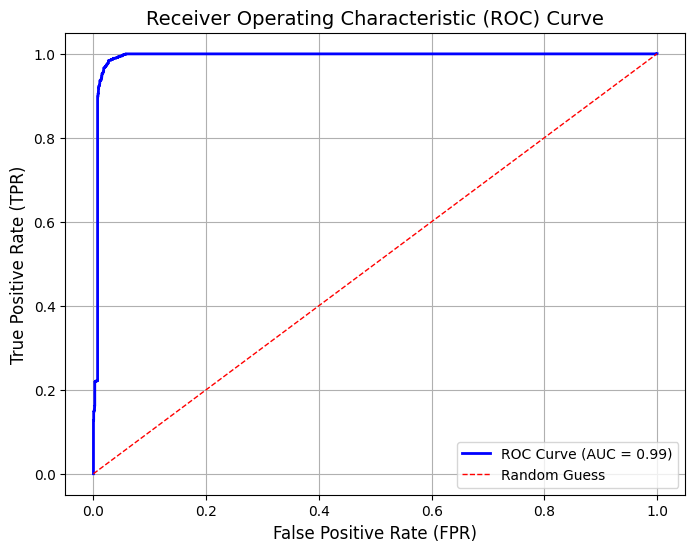

In [22]:
from sklearn.metrics import roc_curve, auc

# Create binary labels for overfitting (MAE <= threshold) and underfitting (MAE > threshold)
threshold_mae = df_result['mae'].median()
df_result['overfit_label'] = (df_result['mae'] <= threshold_mae).astype(int)

# Use R² as a proxy for predicted probabilities (normalize R² to [0, 1])
df_result['predicted_prob'] = (df_result['r2'] - df_result['r2'].min()) / (df_result['r2'].max() - df_result['r2'].min())

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(df_result['overfit_label'], df_result['predicted_prob'])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=1, label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [23]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.neural_network import MLPRegressor

# Pastikan X_train_scaled dan y_train telah didefinisikan sebelumnya
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define a custom scorer for MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Define the MLP Regressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 64), activation='tanh', max_iter=500, random_state=42)

# Perform cross-validation
cross_val_mae = cross_val_score(mlp_model, X_train_scaled, y_train, cv=kf, scoring=mae_scorer)

# Display Cross-Validation Results
mean_mae = -np.mean(cross_val_mae)
std_mae = np.std(-cross_val_mae)

print(f"Cross-Validation Mean MAE: {mean_mae:.4f}")
print(f"Cross-Validation MAE Standard Deviation: {std_mae:.4f}")

if std_mae > mean_mae * 0.1:
    print("Model may exhibit overfitting or instability across folds.")
else:
    print("Model appears to generalize well across folds.")

c:\Users\NITRO 5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and 

Cross-Validation Mean MAE: 2718.6824
Cross-Validation MAE Standard Deviation: 74.9224
Model appears to generalize well across folds.


c:\Users\NITRO 5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


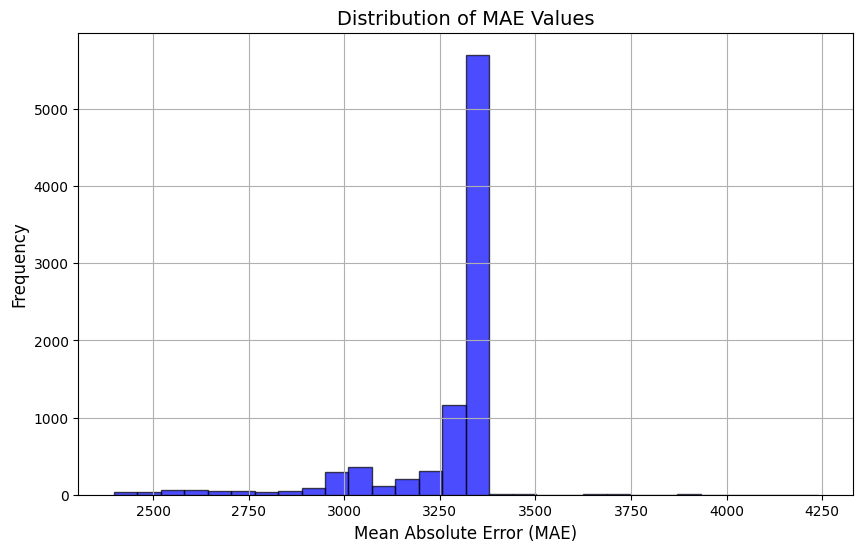

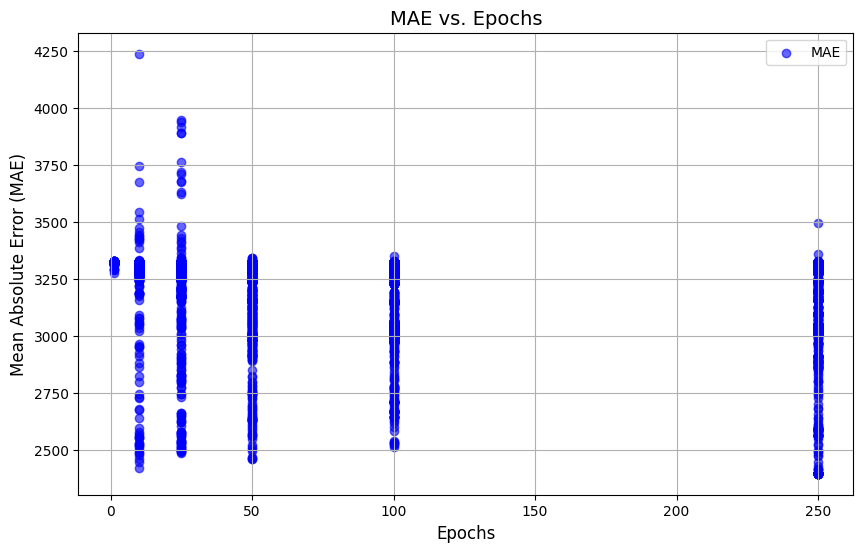

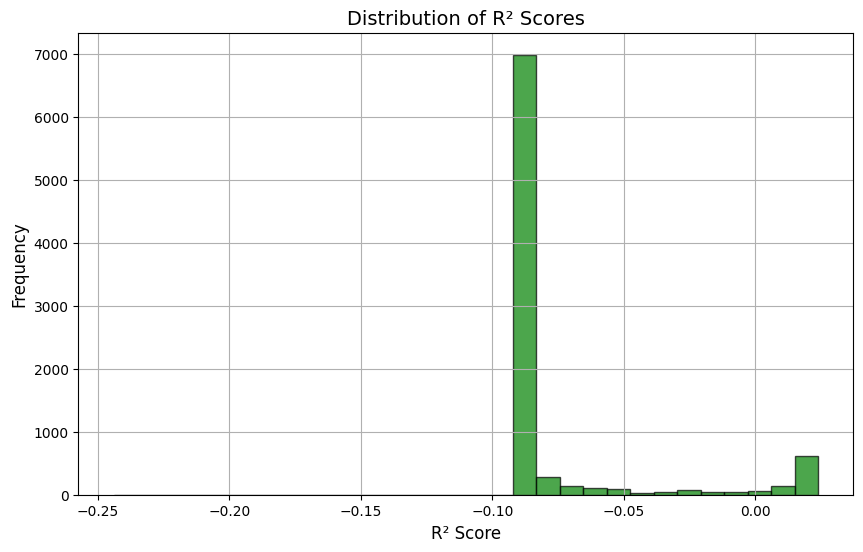

In [ ]:
# Plot 1: Distribution of MAE values
plt.figure(figsize=(10, 6))
plt.hist(df_result['mae'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of MAE Values', fontsize=14)
plt.xlabel('Mean Absolute Error (MAE)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Plot 2: MAE vs. Number of Epochs
plt.figure(figsize=(10, 6))
plt.scatter(df_result['epochs'], df_result['mae'], color='blue', alpha=0.6, label='MAE')
plt.title('MAE vs. Epochs', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Plot 3: R² Score Distribution
plt.figure(figsize=(10, 6))
plt.hist(df_result['r2'], bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Distribution of R² Scores', fontsize=14)
plt.xlabel('R² Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_19212\548370846.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="viridis")
C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_19212\548370846.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="viridis")


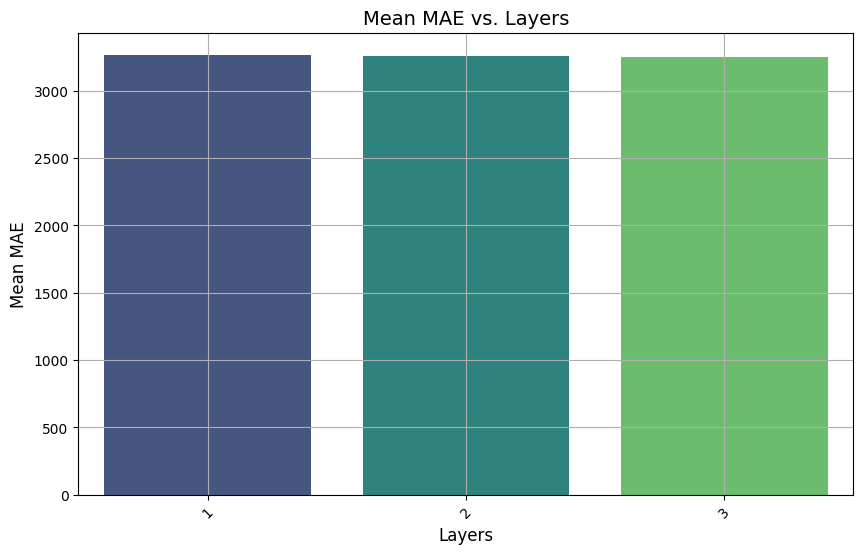

C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_19212\548370846.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="viridis")
C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_19212\548370846.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="viridis")


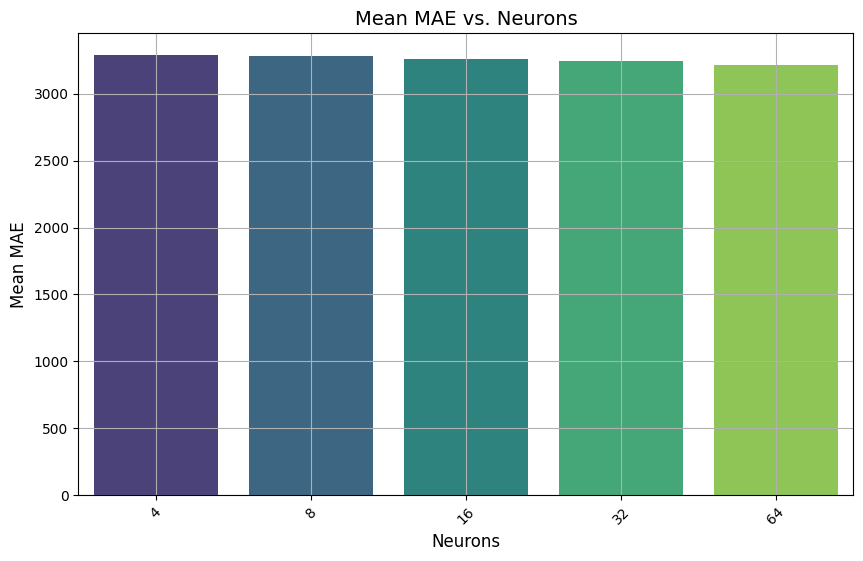

C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_19212\548370846.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="viridis")
C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_19212\548370846.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="viridis")


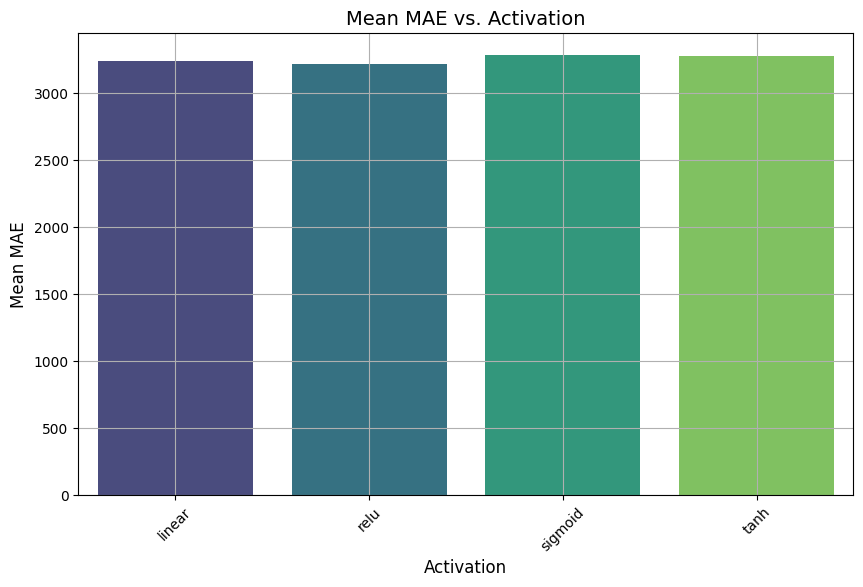

C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_19212\548370846.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="viridis")
C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_19212\548370846.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="viridis")


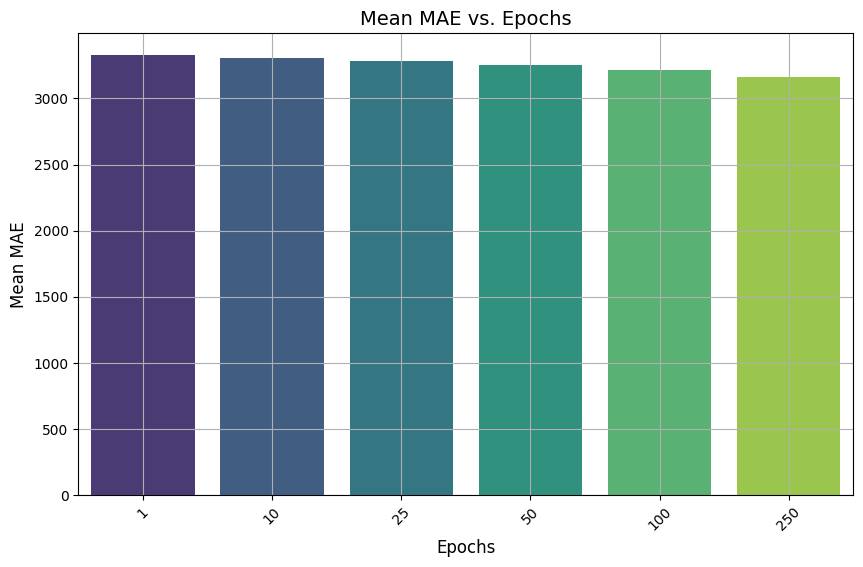

C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_19212\548370846.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="viridis")
C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_19212\548370846.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="viridis")


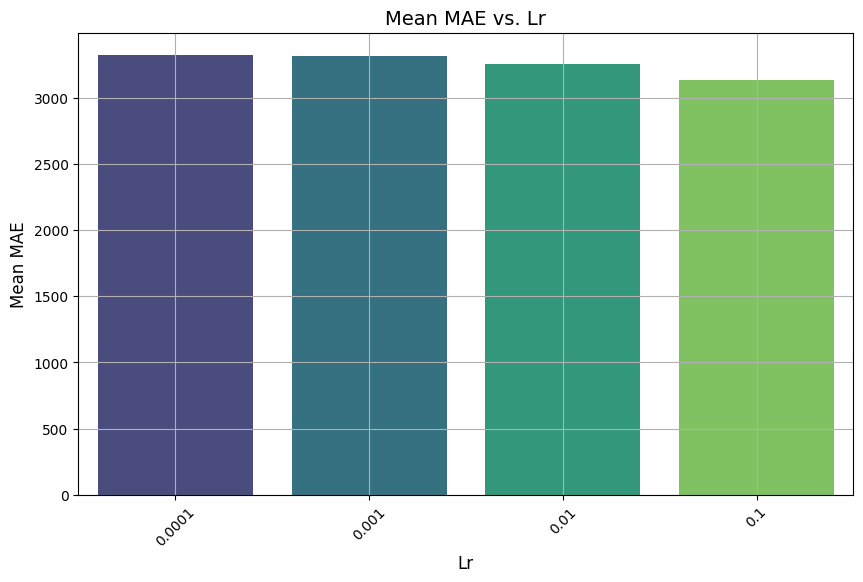

C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_19212\548370846.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="viridis")
C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_19212\548370846.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="viridis")


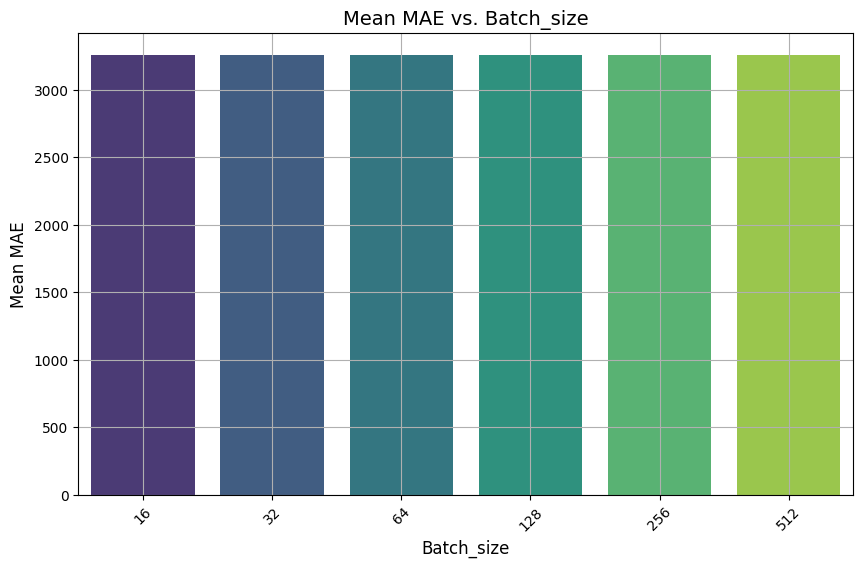

In [ ]:
# Select relevant hyperparameters and mean MAE
hyperparameters = ['layers', 'neurons', 'activation', 'epochs', 'lr', 'batch_size']
mean_mae_by_hyperparameter = df_result.groupby(hyperparameters)['mae'].mean().reset_index()

# Plot mean MAE against each hyperparameter
for param in hyperparameters:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="viridis")
    plt.title(f'Mean MAE vs. {param.capitalize()}', fontsize=14)
    plt.xlabel(param.capitalize(), fontsize=12)
    plt.ylabel('Mean MAE', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()